In [1]:
import pandas as pd
import numpy as np # We'll need numpy for more advanced NaN handling

# The official URL from the NASA Exoplanet Archive
# https://exoplanetarchive.ipac.caltech.edu/docs/data.html
url = "https://exoplanetarchive.ipac.caltech.edu/TAP/sync?query=select+pl_name,hostname,discoverymethod,pl_orbper,pl_rade,pl_bmasse,st_teff,st_rad,st_mass,disc_year+from+ps&format=csv"

# Load the data into a pandas DataFrame
df = pd.read_csv(url) # go and read the manual

In [3]:
print("Our Raw Exoplanet Data (First 5 Rows):")
print(df.head())

Our Raw Exoplanet Data (First 5 Rows):
      pl_name  hostname discoverymethod  pl_orbper    pl_rade  pl_bmasse  \
0  Kepler-6 b  Kepler-6         Transit   3.234699  13.101000        NaN   
1  Kepler-6 b  Kepler-6         Transit   3.234699        NaN        NaN   
2  Kepler-6 b  Kepler-6         Transit   3.234699        NaN        NaN   
3  Kepler-6 b  Kepler-6         Transit   3.234702  13.103321  201.18639   
4  Kepler-6 b  Kepler-6         Transit   3.234699  13.380000        NaN   

   st_teff   st_rad  st_mass  disc_year  
0   5660.0  1.26100    1.090       2009  
1   5613.0  1.31474    0.990       2009  
2   5647.0  1.39100    1.209       2009  
3   5647.0  1.26100    1.114       2009  
4   5690.0  1.29000    1.050       2009  


In [4]:
print("\n--- Mission Critical Info ---")
df.info()


--- Mission Critical Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38779 entries, 0 to 38778
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pl_name          38779 non-null  object 
 1   hostname         38779 non-null  object 
 2   discoverymethod  38779 non-null  object 
 3   pl_orbper        35545 non-null  float64
 4   pl_rade          26789 non-null  float64
 5   pl_bmasse        6768 non-null   float64
 6   st_teff          35435 non-null  float64
 7   st_rad           35674 non-null  float64
 8   st_mass          32797 non-null  float64
 9   disc_year        38779 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 3.0+ MB


In [5]:
df.describe()

,pl_orbper,pl_rade,pl_bmasse,st_teff,st_rad,st_mass,disc_year
count,3.554500e+04,26789.000000,6768.000000,35435.000000,35674.000000,32797.000000,38779.000000
mean,1.228855e+04,5.442253,717.461554,5464.412349,1.152052,0.944379,2015.507156
std,2.133482e+06,72.197690,1459.209790,994.063188,1.780387,0.326357,3.956813
min,9.070629e-02,0.270000,0.015000,415.000000,0.012300,0.003100,1992.000000
25%,4.388848e+00,1.550000,13.923017,5100.000000,0.788000,0.812000,2014.000000
50%,1.033840e+01,2.290000,195.891640,5614.000000,0.951815,0.960000,2016.000000
75%,2.644439e+01,3.250000,670.621300,5952.000000,1.214000,1.071000,2016.000000
max,4.020000e+08,4282.980000,25426.400000,57000.000000,88.475000,23.560000,2025.000000


In [6]:
df.isnull()

,pl_name,hostname,discoverymethod,pl_orbper,pl_rade,pl_bmasse,st_teff,st_rad,st_mass,disc_year
0,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,True,True,False,False,False,False
2,False,False,False,False,True,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
38774,False,False,False,False,True,True,False,False,False,False
38775,False,False,False,True,False,True,False,False,True,False
38776,False,False,False,False,False,True,False,False,False,False
38777,False,False,False,False,False,True,False,False,False,False


In [7]:
df.isnull().sum()


pl_name                0
hostname               0
discoverymethod        0
pl_orbper           3234
pl_rade            11990
pl_bmasse          32011
st_teff             3344
st_rad              3105
st_mass             5982
disc_year              0
dtype: int64

In [11]:
x = df.isnull().sum().tolist()
print(x)

[0, 0, 0, 3234, 11990, 32011, 3344, 3105, 5982, 0]


In [14]:
y = [0] * len(x)  # Initialize y with the same length as x
for i in range(len(x)):
    y[i] = 38779 - x[i]
print(y)

[38779, 38779, 38779, 35545, 26789, 6768, 35435, 35674, 32797, 38779]


In [15]:
df[['pl_orbper', 'pl_rade']]

,pl_orbper,pl_rade
0,3.234699,13.101000
1,3.234699,NaN
2,3.234699,NaN
3,3.234702,13.103321
4,3.234699,13.380000
...,...,...
38774,41.028139,NaN
38775,NaN,3.831000
38776,41.029020,4.460000
38777,41.028064,4.140000


In [21]:
# It's good practice to work on a copy
df_cleaned = df.copy()

# Calculate the median for the columns we want to fill
# We'll calculate them from the original data before we start changing it
median_radius = df_cleaned['st_teff'].median()
median_mass = df_cleaned['st_rad'].median()
median_orb_period = df_cleaned['st_mass'].median()

# Impute the missing values using the calculated medians
# df_cleaned['pl_rade'].fillna(median_radius, inplace=True) # Avoid inplace=True in a copy object
df_cleaned['st_teff'] = df_cleaned['st_teff'].fillna(median_radius)
df_cleaned['st_rad'] = df_cleaned['st_rad'].fillna(median_mass)
df_cleaned['st_mass'] = df_cleaned['st_mass'].fillna(median_orb_period)
# # or better use
# df_cleaned.fillna({
#     'pl_rade': df_cleaned['pl_rade'].median(),
#     'pl_bmasse': df_cleaned['pl_bmasse'].median(),
#     'pl_orbper': df_cleaned['pl_orbper'].median()
# }, inplace=True)

x[0] = df_cleaned['st_teff'].isnull().sum()
x[1] = df_cleaned['st_rad'].isnull().sum()
x[2] = df_cleaned['st_mass'].isnull().sum()
print(x)

[np.int64(0), np.int64(0), np.int64(0), 3234, 11990, 32011, 3344, 3105, 5982, 0]


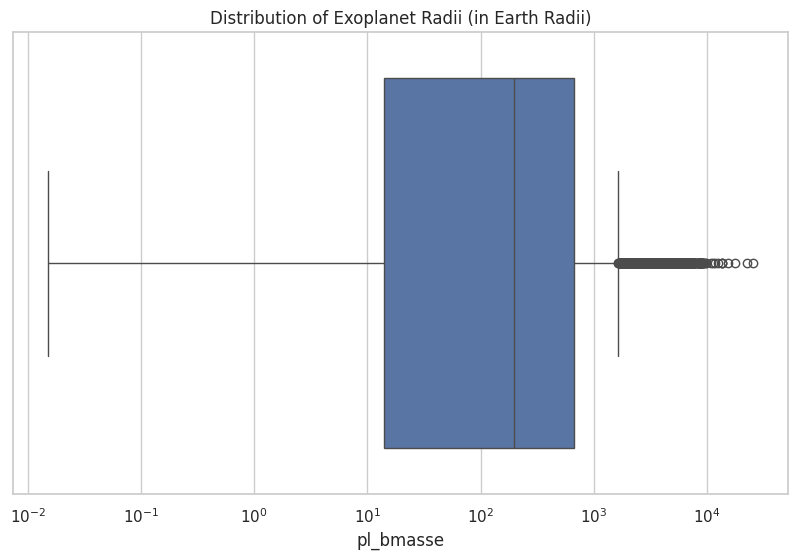

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a nice style for our plots
sns.set_theme(style="whitegrid")

# Let's visualize the distribution of Planet Radius
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_cleaned['pl_bmasse'])
plt.title('Distribution of Exoplanet Radii (in Earth Radii)')
plt.xscale('log') # Log scale is often essential for astronomical data!
plt.show()

In [23]:
# Explain this syntax
tmp = df_cleaned[df_cleaned['pl_bmasse'] < 800] # 


In [24]:
tmp

,pl_name,hostname,discoverymethod,pl_orbper,pl_rade,pl_bmasse,st_teff,st_rad,st_mass,disc_year
0,Kepler-6 b,Kepler-6,Transit,3.234699,13.101000,NaN,5660.0,1.261,1.090,2009
3,Kepler-6 b,Kepler-6,Transit,3.234702,13.103321,201.18639,5647.0,1.261,1.114,2009
4,Kepler-6 b,Kepler-6,Transit,3.234699,13.380000,NaN,5690.0,1.290,1.050,2009
6,Kepler-6 b,Kepler-6,Transit,3.234699,13.060000,NaN,5640.0,1.291,1.047,2009
7,Kepler-6 b,Kepler-6,Transit,3.234699,13.410000,NaN,5640.0,1.291,1.047,2009
...,...,...,...,...,...,...,...,...,...,...
38773,Kepler-33 f,Kepler-33,Transit,41.029000,4.000000,9.65000,5614.0,1.690,1.100,2011
38775,Kepler-33 f,Kepler-33,Transit,NaN,3.831000,NaN,5947.0,1.655,0.960,2011
38776,Kepler-33 f,Kepler-33,Transit,41.029020,4.460000,NaN,5904.0,1.820,1.291,2011
38777,Kepler-33 f,Kepler-33,Transit,41.028064,4.140000,NaN,5900.0,1.694,1.100,2011
